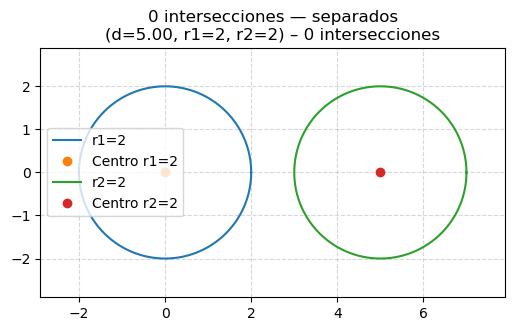

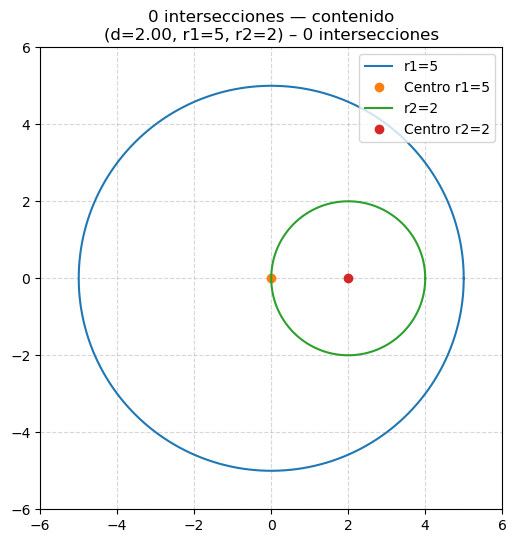

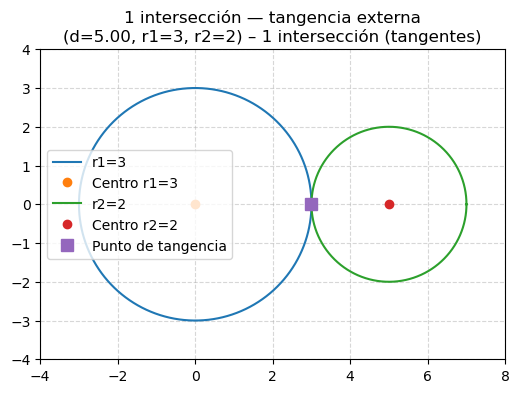

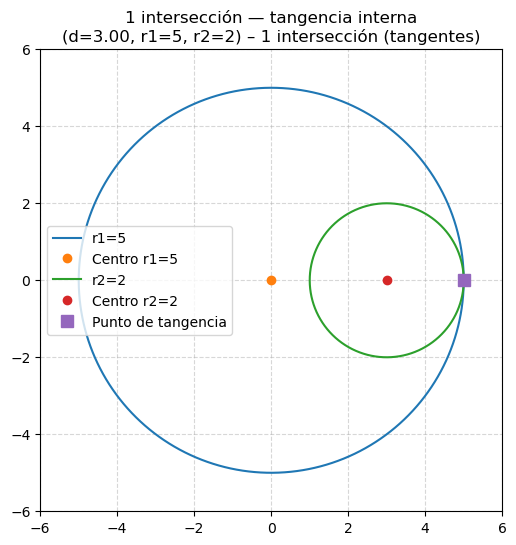

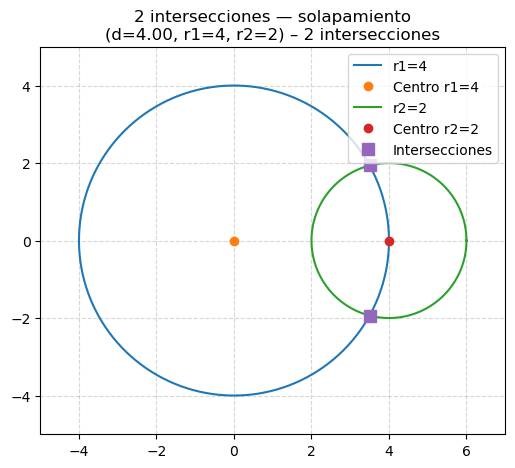

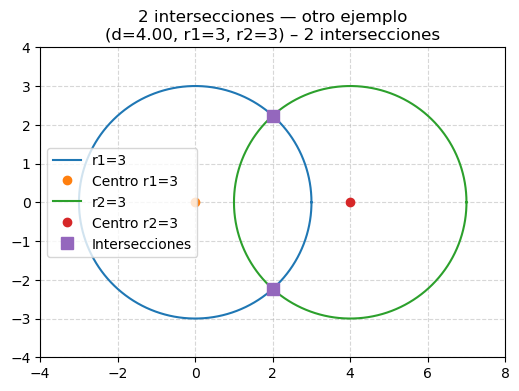

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def circle_plot(ax, center, r, label):
    theta = np.linspace(0, 2*np.pi, 600)
    x = center[0] + r*np.cos(theta)
    y = center[1] + r*np.sin(theta)
    ax.plot(x, y, label=label)
    ax.plot(center[0], center[1], 'o', label=f"Centro {label}")
    return ax

def circle_intersections(c1, c2, r1, r2, eps=1e-12):
    # Intersecciones entre círculos centrados en c1 y c2, radios r1 y r2
    x1, y1 = c1
    x2, y2 = c2
    dx, dy = x2 - x1, y2 - y1
    d = np.hypot(dx, dy)

    # Casos sin solución
    if d > r1 + r2 + eps:      # separados
        return []
    if d < abs(r1 - r2) - eps: # uno contenido en el otro sin tocar
        return []
    if d < eps and abs(r1 - r2) < eps:
        # Círculos coincidentes: infinitas intersecciones (no marcamos puntos)
        return None

    # Tangentes (1 punto)
    if abs(d - (r1 + r2)) <= eps or abs(d - abs(r1 - r2)) <= eps:
        a = (r1**2 - r2**2 + d**2) / (2*d) if d > eps else 0.0
        x3 = x1 + a * dx / d if d > eps else x1
        y3 = y1 + a * dy / d if d > eps else y1
        return [(x3, y3)]

    # Dos puntos
    a = (r1**2 - r2**2 + d**2) / (2*d)
    h_sq = r1**2 - a**2
    if h_sq < 0:  # robustez numérica
        h_sq = 0.0
    h = np.sqrt(h_sq)
    x3 = x1 + a * dx / d
    y3 = y1 + a * dy / d
    rx = -dy * (h / d)
    ry =  dx * (h / d)
    return [(x3 + rx, y3 + ry), (x3 - rx, y3 - ry)]

def show_case(title, c1, c2, r1, r2):
    fig, ax = plt.subplots(figsize=(6,6))
    circle_plot(ax, c1, r1, f"r1={r1}")
    circle_plot(ax, c2, r2, f"r2={r2}")
    pts = circle_intersections(c1, c2, r1, r2)
    if pts is None:
        note = "Círculos coincidentes (infinitas intersecciones)"
    elif len(pts) == 0:
        note = "0 intersecciones"
    elif len(pts) == 1:
        note = "1 intersección (tangentes)"
        ax.plot(pts[0][0], pts[0][1], 's', markersize=8, label="Punto de tangencia")
    else:
        note = "2 intersecciones"
        ax.plot([pts[0][0], pts[1][0]], [pts[0][1], pts[1][1]], 's', markersize=8, label="Intersecciones")

    d = np.hypot(c2[0]-c1[0], c2[1]-c1[1])
    ax.set_title(f"{title}\n(d={d:.2f}, r1={r1}, r2={r2}) – {note}")
    ax.set_aspect('equal', 'box')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='best')

    # Límites automáticos para ver todo
    all_x = [c1[0]-r1, c1[0]+r1, c2[0]-r2, c2[0]+r2]
    all_y = [c1[1]-r1, c1[1]+r1, c2[1]-r2, c2[1]+r2]
    pad = 0.1 * max(max(all_x)-min(all_x), max(all_y)-min(all_y))
    ax.set_xlim(min(all_x)-pad, max(all_x)+pad)
    ax.set_ylim(min(all_y)-pad, max(all_y)+pad)
    plt.show()

# ---- CASOS ----
# 0 intersecciones — separados (d > r1 + r2)
show_case("0 intersecciones — separados", c1=(0,0), c2=(5,0), r1=2, r2=2)

# 0 intersecciones — uno dentro del otro sin tocar (d < |r1 - r2|)
show_case("0 intersecciones — contenido", c1=(0,0), c2=(2,0), r1=5, r2=2)

# 1 intersección — tangentes por fuera (d = r1 + r2)
show_case("1 intersección — tangencia externa", c1=(0,0), c2=(5,0), r1=3, r2=2)

# 1 intersección — tangentes por dentro (d = |r1 - r2|)
show_case("1 intersección — tangencia interna", c1=(0,0), c2=(3,0), r1=5, r2=2)

# 2 intersecciones — solapamiento normal (|r1 - r2| < d < r1 + r2)
show_case("2 intersecciones — solapamiento", c1=(0,0), c2=(4,0), r1=4, r2=2)

# 2 intersecciones — otro ejemplo (ambos mismos radios)
show_case("2 intersecciones — otro ejemplo", c1=(0,0), c2=(4,0), r1=3, r2=3)

Soluciones finales: 1
  #1: (2.5, 1.5)


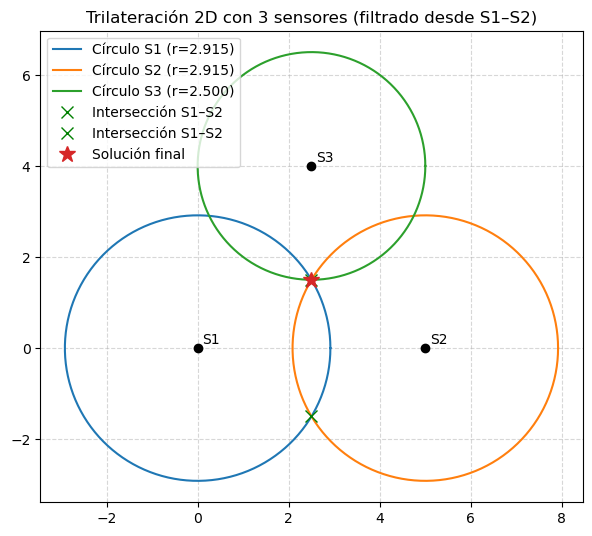

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# =================== Helpers ===================
def circle_points(center, r, n=400):
    t = np.linspace(0, 2*np.pi, n)
    return center[0] + r*np.cos(t), center[1] + r*np.sin(t)

def circle_intersections(c1, c2, r1, r2, eps=1e-12):
    x1, y1 = c1; x2, y2 = c2
    dx, dy = x2 - x1, y2 - y1
    d = np.hypot(dx, dy)
    # Sin solución
    if d > r1 + r2 + eps:      return []
    if d < abs(r1 - r2) - eps: return []
    # Coincidentes (infinitas intersecciones): lo marcamos como None
    if d < eps and abs(r1 - r2) < eps: return None
    # 1 punto (tangencia)
    if abs(d - (r1 + r2)) <= eps or abs(d - abs(r1 - r2)) <= eps:
        a = (r1**2 - r2**2 + d**2) / (2*d) if d > eps else 0.0
        x3 = x1 + a*dx/d if d > eps else x1
        y3 = y1 + a*dy/d if d > eps else y1
        return [(x3, y3)]
    # 2 puntos
    a = (r1**2 - r2**2 + d**2) / (2*d)
    h2 = max(r1**2 - a**2, 0.0)
    h = np.sqrt(h2)
    xm = x1 + a*dx/d
    ym = y1 + a*dy/d
    rx = -dy*(h/d); ry = dx*(h/d)
    return [(xm+rx, ym+ry), (xm-rx, ym-ry)]

def unique_points(pts, tol=1e-6):
    uniq = []
    for p in pts:
        if not any(np.hypot(p[0]-q[0], p[1]-q[1]) < tol for q in uniq):
            uniq.append(p)
    return uniq

# =================== Datos ===================
# Sensores
S1 = (0.0, 0.0)
S2 = (5.0, 0.0)
S3 = (2.5, 4.0)

# --- Opción A: radios consistentes a partir de un punto verdadero ---
use_true_point = True
P_true = (2.5, 1.5)  # probá moverlo

if use_true_point:
    r1 = np.hypot(P_true[0]-S1[0], P_true[1]-S1[1])
    r2 = np.hypot(P_true[0]-S2[0], P_true[1]-S2[1])
    r3 = np.hypot(P_true[0]-S3[0], P_true[1]-S3[1])
else:
    # --- Opción B: setear radios a mano (puede dar 0/1/2 soluciones finales) ---
    r1, r2, r3 = 4.0, 3.5, 3.0

# Tolerancia para validar contra el tercer sensor
tol_r = 1e-8

# =================== Cálculo ===================
# 1) Intersecciones solo del par base S1–S2
pair_candidates = circle_intersections(S1, S2, r1, r2)

# Manejo de casos especiales
if pair_candidates is None:
    print("Círculos S1–S2 coinciden (infinitas intersecciones). No se puede filtrar con S3 así nomás.")
    pair_candidates = []
elif len(pair_candidates) == 0:
    print("S1–S2 no se cruzan → 0 candidatos para testear con S3.")

# 2) Filtrar con S3: quedarse con los que cumplen |dist(S3, p) - r3| <= tol
final_candidates = []
for p in pair_candidates:
    if abs(np.hypot(p[0]-S3[0], p[1]-S3[1]) - r3) <= tol_r:
        final_candidates.append(p)

# 3) Deduplicar
final_candidates = unique_points(final_candidates, tol=1e-6)

print(f"Soluciones finales: {len(final_candidates)}")
for i, p in enumerate(final_candidates, 1):
    print(f"  #{i}: {p}")

# =================== Gráfico ===================
fig, ax = plt.subplots(figsize=(7,7))

# Círculos y sensores
for (S, r, name) in [(S1, r1, "S1"), (S2, r2, "S2"), (S3, r3, "S3")]:
    x, y = circle_points(S, r)
    ax.plot(x, y, label=f"Círculo {name} (r={r:.3f})")
    ax.plot(S[0], S[1], 'ko')
    ax.text(S[0]+0.1, S[1]+0.1, name)

# Intersecciones del par base
if pair_candidates:
    for p in pair_candidates:
        ax.plot(p[0], p[1], 'gx', ms=9, label="Intersección S1–S2")


# (Opcional) punto verdadero
if use_true_point:
    ax.plot(P_true[0], P_true[1], '*', ms=12, label="Solución final")

ax.set_aspect('equal', 'box')
ax.grid(True, ls='--', alpha=0.5)
ax.legend(loc='best')
ax.set_title("Trilateración 2D con 3 sensores (filtrado desde S1–S2)")
plt.show()